# Elections

### Election data included in the old version of KYD:
- 2022 Gubernatorial Election Results: 
    - Columns: 'ed', 'cd','hochul', 'zeldin', 'gov_votes', 'voters_nov22'
    - Note: City Council District 2023 merged with election districts 2022 using largest intersection logic
- 2022 Gubernatorial Election Results in geojson format: 
    - Columns: 'ed', 'cd', 'dem', 'rep', 'con', 'wor', 'oth', 'blank', 'total'
    - Note: City Council District 2023 merged with election districts 2022 using largest intersection logic
- 2021 Mayoral Election Results:
    - Columns: 'ed', 'cd','adams', 'sliwa', 'mayor_votes'
    - Note: City Council District 2023 merged with election districts 2021 using largest intersection logic
- 2021 primary round 1 and mayoral election results in GeoJSON format
    - Columns: 'ed', 'cd', 'adams', 'sliwa', 'mayor_votes', 'geometry', 'prim_adams', 'prim_wiley', 'prim_garcia', 'prim_yang', 'prim_stringer','prim_morales', 'prim_mcguire', 'prim_donovan', 'prim_votes'
    - Note: City Council District 2023 merged with election districts 2021 using largest intersection logic.
### What we need for the new version:
- DONE: 2024 Presidential General Election Results
- DONE: 2024 Presidential General Election Results in GeoJSON format
- DONE: 2024 voter turnout for presidential general election 
- DONE: 2021 Mayoral Election Results
- DONE: 2021 primary round 1 and mayoral election results in GeoJSON format
- TO DO: 2021 mayoral election turnout
- TO DO: City Council Results
- TO DO: City Council election turnout


### Adding active voter counts to election results

In [38]:
## import libraries

import pandas as pd
import geopandas as gpd
import csv

In [39]:
## read in the csv file that includes the presidential election data

prez_election_results = pd.read_excel("../input/elections/presidential_2024.xlsx", sheet_name = "presidential_2024", dtype ={"ed": object})
prez_election_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ed                          4419 non-null   object 
 1   county                      4419 non-null   object 
 2   ab_military                 4419 non-null   int64  
 3   affidavit                   4419 non-null   int64  
 4   trump_con                   4187 non-null   float64
 5   trump_rep                   4187 non-null   float64
 6   fed                         4419 non-null   int64  
 7   harris_dem                  4187 non-null   float64
 8   harris_wor                  4187 non-null   float64
 9   manually_counted_emergency  4419 non-null   int64  
 10  public_counter              4419 non-null   int64  
 11  scattered                   3923 non-null   float64
 12  Grand Total                 4419 non-null   int64  
 13  harris_tot                  4419 

In [40]:
prez_election_results.head()

,ed,county,ab_military,affidavit,trump_con,trump_rep,fed,harris_dem,harris_wor,manually_counted_emergency,public_counter,scattered,Grand Total,harris_tot,trump_tot,prez_votes
0,23001,Queens,158,18,149.0,862.0,2,281.0,14.0,0,1149,13.0,2646,295,1011,1325
1,23002,Queens,128,27,121.0,836.0,6,268.0,21.0,0,1105,12.0,2524,289,957,1260
2,23003,Queens,37,8,33.0,297.0,0,93.0,6.0,0,388,3.0,865,99,330,433
3,23004,Queens,161,25,59.0,812.0,5,375.0,16.0,0,1090,12.0,2555,391,871,1276
4,23005,Queens,116,36,60.0,876.0,5,315.0,21.0,0,1137,11.0,2577,336,936,1289


In [41]:
## read in the voter enrollment files

richmond = pd.read_excel("../input/voter_enrollment/richmonded_nov24.xlsx", dtype ={"ed": object})
bronx = pd.read_excel("../input/voter_enrollment/bronxed_nov24.xlsx", dtype ={"ed": object})
kings = pd.read_excel("../input/voter_enrollment/kingsed_nov24.xlsx", dtype ={"ed": object})
ny = pd.read_excel("../input/voter_enrollment/new-yorked_nov24.xlsx", dtype ={"ed": object})
queens = pd.read_excel("../input/voter_enrollment/queensed_nov24.xlsx", dtype ={"ed": object})

In [42]:
## put the enrollment files into a list
all_enrolled_voters = [richmond, bronx, kings, ny, queens]

In [43]:
## combine the excel files into a single df
enrollment = pd.concat(all_enrolled_voters, ignore_index = True)
enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12373 entries, 0 to 12372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  12373 non-null  object
 1   ed      12373 non-null  object
 2   status  12373 non-null  object
 3   dem     12373 non-null  int64 
 4   rep     12373 non-null  int64 
 5   con     12373 non-null  int64 
 6   wor     12373 non-null  int64 
 7   oth     12373 non-null  int64 
 8   blank   12373 non-null  int64 
 9   total   12373 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 966.8+ KB


In [44]:
## filter for only active voter counts

active_voters = enrollment[enrollment["status"] == "Active"]
active_voters.head()

,county,ed,status,dem,rep,con,wor,oth,blank,total
0,Richmond,61001,Active,908,141,17,7,26,389,1488
3,Richmond,61002,Active,851,94,2,7,27,379,1360
6,Richmond,61003,Active,1248,71,6,8,31,338,1702
9,Richmond,61004,Active,1303,109,12,10,35,397,1866
12,Richmond,61005,Active,582,248,11,2,32,332,1207


In [45]:
active_voters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4132 entries, 0 to 12370
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  4132 non-null   object
 1   ed      4132 non-null   object
 2   status  4132 non-null   object
 3   dem     4132 non-null   int64 
 4   rep     4132 non-null   int64 
 5   con     4132 non-null   int64 
 6   wor     4132 non-null   int64 
 7   oth     4132 non-null   int64 
 8   blank   4132 non-null   int64 
 9   total   4132 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 355.1+ KB


In [46]:
## combine active_voters with results

prez_results_w_voters = pd.merge(prez_election_results,
                                  active_voters[['ed','total']],
                                  on='ed',
                                  how='left')

In [47]:
## take a peak
prez_results_w_voters

,ed,county,ab_military,affidavit,trump_con,trump_rep,fed,harris_dem,harris_wor,manually_counted_emergency,public_counter,scattered,Grand Total,harris_tot,trump_tot,prez_votes,total
0,23001,Queens,158,18,149.0,862.0,2,281.0,14.0,0,1149,13.0,2646,295,1011,1325,1652.0
1,23002,Queens,128,27,121.0,836.0,6,268.0,21.0,0,1105,12.0,2524,289,957,1260,1664.0
2,23003,Queens,37,8,33.0,297.0,0,93.0,6.0,0,388,3.0,865,99,330,433,568.0
3,23004,Queens,161,25,59.0,812.0,5,375.0,16.0,0,1090,12.0,2555,391,871,1276,1702.0
4,23005,Queens,116,36,60.0,876.0,5,315.0,21.0,0,1137,11.0,2577,336,936,1289,1627.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,87055,Bronx,55,18,13.0,173.0,0,467.0,18.0,0,614,8.0,1366,485,186,687,1370.0
4415,87056,Bronx,0,0,0.0,3.0,0,4.0,1.0,0,8,NaN,16,5,3,8,19.0
4416,87057,Bronx,0,0,0.0,0.0,0,0.0,0.0,0,0,NaN,0,0,0,0,NaN
4417,87058,Bronx,0,0,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,0,0,NaN


### Combine crosswalk and results/active voters dataframe

In [48]:
## import crosswalk
ed_cd_crosswalk = gpd.read_file('../input/GIS/cd23_ed25_crosswalk.geojson')

In [49]:
## take a look
ed_cd_crosswalk.head()

,ed,cd,geometry
0,23001,32,"POLYGON ((1006386.279 144120.655, 1006261.842 ..."
1,23004,32,"POLYGON ((1025161.154 147197.743, 1025055.81 1..."
2,23005,32,"POLYGON ((1026261.273 147727.118, 1026236.365 ..."
3,23006,32,"POLYGON ((1027235.438 148192.081, 1026988.778 ..."
4,23007,32,"POLYGON ((1026969.618 151265.788, 1026962.883 ..."


In [50]:
## merge the crosswalk with the full file

prez_election_24 = pd.merge(prez_results_w_voters,
                 ed_cd_crosswalk[['ed','cd']],
                 on = "ed",
                 how = "left")

In [51]:
## take a peak
prez_election_24.head()

,ed,county,ab_military,affidavit,trump_con,trump_rep,fed,harris_dem,harris_wor,manually_counted_emergency,public_counter,scattered,Grand Total,harris_tot,trump_tot,prez_votes,total,cd
0,23001,Queens,158,18,149.0,862.0,2,281.0,14.0,0,1149,13.0,2646,295,1011,1325,1652.0,32
1,23002,Queens,128,27,121.0,836.0,6,268.0,21.0,0,1105,12.0,2524,289,957,1260,1664.0,32
2,23003,Queens,37,8,33.0,297.0,0,93.0,6.0,0,388,3.0,865,99,330,433,568.0,32
3,23004,Queens,161,25,59.0,812.0,5,375.0,16.0,0,1090,12.0,2555,391,871,1276,1702.0,32
4,23005,Queens,116,36,60.0,876.0,5,315.0,21.0,0,1137,11.0,2577,336,936,1289,1627.0,32


In [52]:
## create new turnout column
prez_election_24["active_voters"] = prez_election_24["total"]

In [53]:
prez_election_24.head()

,ed,county,ab_military,affidavit,trump_con,trump_rep,fed,harris_dem,harris_wor,manually_counted_emergency,public_counter,scattered,Grand Total,harris_tot,trump_tot,prez_votes,total,cd,active_voters
0,23001,Queens,158,18,149.0,862.0,2,281.0,14.0,0,1149,13.0,2646,295,1011,1325,1652.0,32,1652.0
1,23002,Queens,128,27,121.0,836.0,6,268.0,21.0,0,1105,12.0,2524,289,957,1260,1664.0,32,1664.0
2,23003,Queens,37,8,33.0,297.0,0,93.0,6.0,0,388,3.0,865,99,330,433,568.0,32,568.0
3,23004,Queens,161,25,59.0,812.0,5,375.0,16.0,0,1090,12.0,2555,391,871,1276,1702.0,32,1702.0
4,23005,Queens,116,36,60.0,876.0,5,315.0,21.0,0,1137,11.0,2577,336,936,1289,1627.0,32,1627.0


In [54]:
## clean up
results_cleaned = prez_election_24.loc[:,["ed",
                                          "cd",
                                          "harris_tot",
                                          "trump_tot",
                                          "prez_votes"]]

In [55]:
## drop null values
prez_election = results_cleaned.dropna(subset = 'cd')

In [56]:
prez_election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4345 entries, 0 to 4418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ed          4345 non-null   object
 1   cd          4345 non-null   object
 2   harris_tot  4345 non-null   int64 
 3   trump_tot   4345 non-null   int64 
 4   prez_votes  4345 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 203.7+ KB


In [57]:
# ## group the results together by council district
# councilwide_results = prez_election.groupby("cd")[["harris_tot","trump_tot","prez_votes",'active_voters']].sum().reset_index()

In [58]:
# ## change cd dtype
# councilwide_results

In [59]:
## write to a file
prez_election.to_csv("../output/elections/citywide_prez_results.csv")

### Get the turnout percentages, write to a file

In [60]:
# grouped = prez_election.groupby("cd")[["prez_votes","active_voters"]].sum().reset_index()
# grouped.head()

In [61]:
# grouped["turnout"] = (grouped["prez_votes"]/grouped["active_voters"])*100

In [62]:
# grouped.head()

In [63]:
# grouped.to_csv("../output/turnout/president_turnout_24.csv")

### Add geometry, write to csv and json files

In [64]:
## take a look at the df's info, specifically the dtypes of each column
prez_election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4345 entries, 0 to 4418
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ed          4345 non-null   object
 1   cd          4345 non-null   object
 2   harris_tot  4345 non-null   int64 
 3   trump_tot   4345 non-null   int64 
 4   prez_votes  4345 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 203.7+ KB


In [65]:
## read in 2022 gov race file
districts = gpd.read_file('../input/GIS/cd23_ed25_crosswalk.geojson')

In [66]:
## look at top of districts file
districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ed        4345 non-null   object  
 1   cd        4345 non-null   object  
 2   geometry  4345 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 102.0+ KB


In [67]:
## change the coordinate system
districts = districts.to_crs(epsg = 4326)
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
## merge the shapefile with the old gov elections data on ed and geom
president_results = pd.merge(prez_election,
                            districts[['ed', 'geometry']],
                            on = "ed",
                            how = "inner")

In [69]:
## transform into geo df
president_results = gpd.GeoDataFrame(president_results,
                                    geometry = president_results.geometry,
                                    crs = 4326
                                    )

In [70]:
president_results.head()

,ed,cd,harris_tot,trump_tot,prez_votes,geometry
0,23001,32,295,1011,1325,"POLYGON ((-73.92033 40.56223, -73.92078 40.561..."
1,23002,32,289,957,1260,"POLYGON ((-73.91017 40.56492, -73.91039 40.564..."
2,23003,32,99,330,433,"POLYGON ((-73.86287 40.56683, -73.86267 40.566..."
3,23004,32,391,871,1276,"POLYGON ((-73.85274 40.57061, -73.85312 40.570..."
4,23005,32,336,936,1289,"POLYGON ((-73.84878 40.57205, -73.84887 40.572..."


In [73]:
## check a single council district to make sure it looks like the KYD district shape
cd1_check = president_results[president_results['cd'] == '1']

<Axes: >

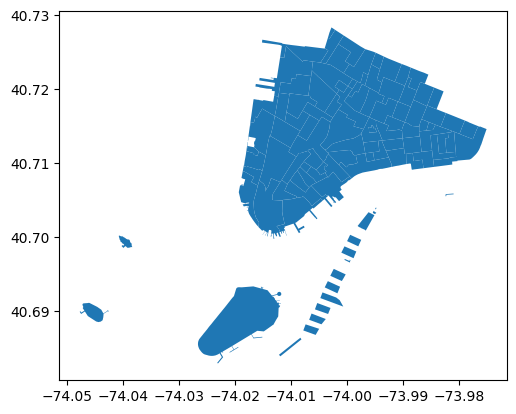

In [74]:
cd1_check.plot()

In [75]:
## rename columns
renamed_results = president_results.rename(columns = {'harris_tot':'harris','trump_tot':'trump','active_voters':'voters_nov24'})

In [76]:
## drop the index 
renamed_results

,ed,cd,harris,trump,prez_votes,geometry
0,23001,32,295,1011,1325,"POLYGON ((-73.92033 40.56223, -73.92078 40.561..."
1,23002,32,289,957,1260,"POLYGON ((-73.91017 40.56492, -73.91039 40.564..."
2,23003,32,99,330,433,"POLYGON ((-73.86287 40.56683, -73.86267 40.566..."
3,23004,32,391,871,1276,"POLYGON ((-73.85274 40.57061, -73.85312 40.570..."
4,23005,32,336,936,1289,"POLYGON ((-73.84878 40.57205, -73.84887 40.572..."
...,...,...,...,...,...,...
4340,87055,18,485,186,687,"POLYGON ((-73.85727 40.81777, -73.85827 40.817..."
4341,87056,18,5,3,8,"POLYGON ((-73.84401 40.81471, -73.84524 40.815..."
4342,87057,15,0,0,0,"POLYGON ((-73.88284 40.84782, -73.88307 40.847..."
4343,87058,17,0,0,0,"POLYGON ((-73.87312 40.83819, -73.87321 40.837..."


In [77]:
renamed_results.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ed          4345 non-null   object  
 1   cd          4345 non-null   object  
 2   harris      4345 non-null   int64   
 3   trump       4345 non-null   int64   
 4   prez_votes  4345 non-null   int64   
 5   geometry    4345 non-null   geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 203.8+ KB


In [78]:
## save as csv
renamed_results.to_csv("../output/elections/president_results.csv")

In [79]:
## save as geojson
renamed_results.to_file("../output/elections/president_results.geojson", driver = "GeoJSON")

In [41]:
gov_race = gpd.read_file('../input/elections/gov22_results.json')

In [42]:
gov_race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ed            4540 non-null   object  
 1   cd            4409 non-null   object  
 2   hochul        4540 non-null   float64 
 3   zeldin        4540 non-null   float64 
 4   gov_votes     4540 non-null   float64 
 5   voters_nov22  4049 non-null   float64 
 6   geometry      4409 non-null   geometry
dtypes: float64(4), geometry(1), object(2)
memory usage: 248.4+ KB


<Axes: >

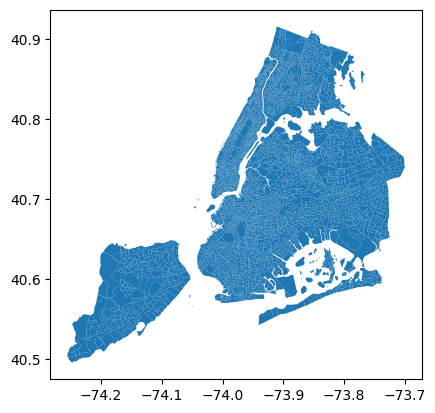

In [43]:
gov_race.plot()

### Mayor's race: 

In [49]:
## import results
mayor_results = pd.read_csv("../input/elections/mayor_results.csv")

In [50]:
mayor_results.head()

,ed,cd,adams,sliwa,mayor_votes
0,23001,32.0,107,469,639
1,23002,32.0,106,499,682
2,23003,32.0,78,475,603
3,23004,32.0,27,66,103
4,23005,32.0,135,311,468


In [64]:
## import 2021 voter enrollment by ed
bronx_voters_21 = pd.read_excel("../input/voter_enrollment/bronxed_nov21.xlsx", dtype = {"cd":"str"})
queens_voters_21 = pd.read_excel("../input/voter_enrollment/queensed_nov21.xlsx", dtype = {"cd":"str"})
ny_voters_21 = pd.read_excel("../input/voter_enrollment/newyorked_nov21.xlsx", dtype = {"cd":"str"})
richmond_voters_21 = pd.read_excel("../input/voter_enrollment/richmonded_nov21.xlsx", dtype = {"cd":"str"})
kings_voters_21 = pd.read_excel("../input/voter_enrollment/kingsed_nov21.xlsx", dtype = {"cd":"str"})

In [65]:
## add the files to a list
all_enrolled_voters_21 = [bronx_voters_21,queens_voters_21,ny_voters_21,richmond_voters_21,kings_voters_21]

In [66]:
## combine the enrollment files together using concat
enrollment_voters_21 = pd.concat(all_enrolled_voters_21, ignore_index = True)
enrollment_voters_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17001 entries, 0 to 17000
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  17001 non-null  object
 1   ed      17001 non-null  int64 
 2   status  17001 non-null  object
 3   dem     17001 non-null  int64 
 4   rep     17001 non-null  int64 
 5   con     17001 non-null  int64 
 6   wor     17001 non-null  int64 
 7   oth     17001 non-null  int64 
 8   blank   17001 non-null  int64 
 9   total   17001 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.3+ MB


In [67]:
## filter for only active voters
active_voters_21 = enrollment_voters_21[enrollment_voters_21["status"] == "Active"]
active_voters_21.head()

,county,ed,status,dem,rep,con,wor,oth,blank,total
0,Bronx,77001,Active,372,17,2,1,11,93,496
3,Bronx,77002,Active,364,18,1,3,6,64,456
6,Bronx,77003,Active,854,63,3,3,26,175,1124
9,Bronx,77004,Active,742,38,1,7,15,142,945
12,Bronx,77005,Active,807,34,6,2,15,145,1009


In [68]:
## combine mayor's race results with enrolled voters counts
mayor_results_w_voters = pd.merge(mayor_results,
                                  active_voters_21[['ed','total']],
                                  on='ed',
                                  how='left')

In [71]:
## group by city council district, sum votes and total active voters
grouped_mayor = mayor_results_w_voters.groupby("cd")[["mayor_votes","total"]].sum().reset_index()

In [74]:
## add new column for percentage of voters who turned out
grouped_mayor["turnout"] = (grouped_mayor["mayor_votes"]/grouped_mayor["total"])*100

In [75]:
## take a peak
grouped_mayor.head()

,cd,mayor_votes,total,turnout
0,1.0,22957,100657.0,22.807157
1,2.0,27432,108977.0,25.172284
2,3.0,27695,105286.0,26.304542
3,4.0,30930,105191.0,29.403656
4,5.0,34650,107411.0,32.259266


In [76]:
## write to a csv
grouped_mayor.to_csv("../output/turnout/mayor_turnout_21.csv")